In [610]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings 
warnings.simplefilter("ignore")
from sklearn import metrics 
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [611]:
def get_boxplot(df, col):
    fig, axes = plt.subplots(figsize = (14, 4))
    sns.boxplot(x='default', y=col, data=df[df['sample']==1], ax=axes)
    axes.set_title('Boxplot for ' + col)
    plt.show()
    
def count_metrics(y_test, y_pred, y_probs):    
    metrics = {}
    metrics['accuracy'] = accuracy_score(y_test, y_pred)
    metrics['f1'] = f1_score(y_test, y_pred)
    metrics['roc_auc'] = roc_auc_score(y_test, y_probs)  
    metrics['confusion'] = confusion_matrix(y_test, y_pred)
    return metrics 

def show_roc_auc(y_test, y_probs):
    fpr, tpr, threshold = roc_curve(y_test, y_probs)
    roc_auc = roc_auc_score(y_test, y_probs)
    plt.figure()
    plt.plot([0, 1], label='Baseline', linestyle='--')
    plt.plot(fpr, tpr, label = 'Regression')
    plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc = 'lower right')
    plt.show()

In [612]:
df_test = pd.read_csv('train.csv')
df_train = pd.read_csv('train.csv')
sample_submission = pd.read_csv('train.csv')

In [613]:
sample_submission.shape

(73799, 14)

In [614]:
df_test.shape

(73799, 14)

In [615]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   client_id         73799 non-null  int64 
 1   education         73492 non-null  object
 2   sex               73799 non-null  object
 3   age               73799 non-null  int64 
 4   car               73799 non-null  object
 5   car_type          73799 non-null  object
 6   decline_app_cnt   73799 non-null  int64 
 7   good_work         73799 non-null  int64 
 8   bki_request_cnt   73799 non-null  int64 
 9   home_address      73799 non-null  int64 
 10  work_address      73799 non-null  int64 
 11  income            73799 non-null  int64 
 12  foreign_passport  73799 non-null  object
 13  default           73799 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


In [616]:
df_train.head(5)

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,M,62,Y,Y,0,0,1,1,2,18000,N,0
1,63161,SCH,F,59,N,N,0,0,3,2,3,19000,N,0
2,25887,SCH,M,25,Y,N,2,0,1,1,2,30000,Y,0
3,16222,SCH,F,53,N,N,0,0,2,2,3,10000,N,0
4,101655,GRD,M,48,N,N,0,1,1,2,3,30000,Y,0


In [617]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   client_id         73799 non-null  int64 
 1   education         73492 non-null  object
 2   sex               73799 non-null  object
 3   age               73799 non-null  int64 
 4   car               73799 non-null  object
 5   car_type          73799 non-null  object
 6   decline_app_cnt   73799 non-null  int64 
 7   good_work         73799 non-null  int64 
 8   bki_request_cnt   73799 non-null  int64 
 9   home_address      73799 non-null  int64 
 10  work_address      73799 non-null  int64 
 11  income            73799 non-null  int64 
 12  foreign_passport  73799 non-null  object
 13  default           73799 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


In [618]:
sample_submission.head(5)

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,M,62,Y,Y,0,0,1,1,2,18000,N,0
1,63161,SCH,F,59,N,N,0,0,3,2,3,19000,N,0
2,25887,SCH,M,25,Y,N,2,0,1,1,2,30000,Y,0
3,16222,SCH,F,53,N,N,0,0,2,2,3,10000,N,0
4,101655,GRD,M,48,N,N,0,1,1,2,3,30000,Y,0


In [619]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   client_id         73799 non-null  int64 
 1   education         73492 non-null  object
 2   sex               73799 non-null  object
 3   age               73799 non-null  int64 
 4   car               73799 non-null  object
 5   car_type          73799 non-null  object
 6   decline_app_cnt   73799 non-null  int64 
 7   good_work         73799 non-null  int64 
 8   bki_request_cnt   73799 non-null  int64 
 9   home_address      73799 non-null  int64 
 10  work_address      73799 non-null  int64 
 11  income            73799 non-null  int64 
 12  foreign_passport  73799 non-null  object
 13  default           73799 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


In [620]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0  # помечаем где у нас тест
df_test['default'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [621]:
data.nunique(dropna=False)

client_id           73799
education               6
sex                     2
age                    52
car                     2
car_type                2
decline_app_cnt        21
good_work               2
bki_request_cnt        38
home_address            3
work_address            3
income                966
foreign_passport        2
default                 2
sample                  2
dtype: int64

In [622]:
num_cols = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']
cat_cols = ['education', 'work_address', 'home_address']
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']

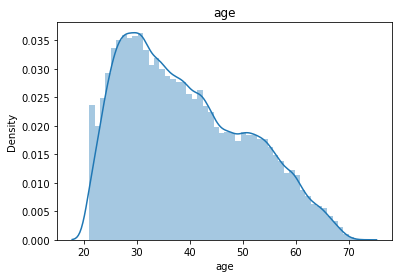

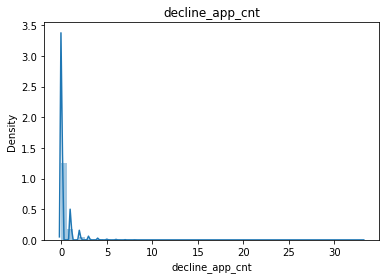

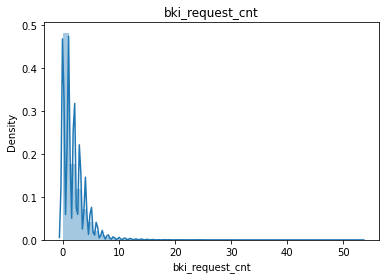

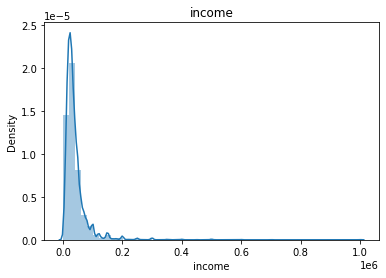

In [623]:
#Проверим распределение числовых признаков:

for i in num_cols:
    plt.figure()
    sns.distplot(data[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

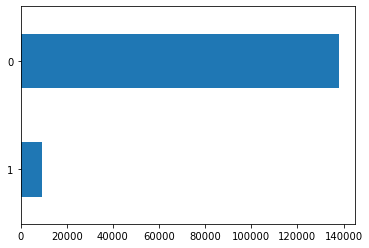

In [624]:
# посмотрим на целевую переменную

data['default'].value_counts(ascending=True).plot(kind='barh')

Сразу можно сказать, что выборка несбалансированная, много больше клиентов без дефолта.

In [625]:
#Посмотрим на тип данных и наличие пропусков:
print(data.info())
print()
print(data.shape)
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147598 entries, 0 to 147597
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   client_id         147598 non-null  int64 
 1   education         146984 non-null  object
 2   sex               147598 non-null  object
 3   age               147598 non-null  int64 
 4   car               147598 non-null  object
 5   car_type          147598 non-null  object
 6   decline_app_cnt   147598 non-null  int64 
 7   good_work         147598 non-null  int64 
 8   bki_request_cnt   147598 non-null  int64 
 9   home_address      147598 non-null  int64 
 10  work_address      147598 non-null  int64 
 11  income            147598 non-null  int64 
 12  foreign_passport  147598 non-null  object
 13  default           147598 non-null  int64 
 14  sample            147598 non-null  int64 
dtypes: int64(10), object(5)
memory usage: 16.9+ MB
None

(147598, 15)
client_id          

В данных о клиентах присутствуют переменные всех типов, не все имеют числовую запись, а также есть пропущенные значения в категориальной переменной 'education'.

Пропущенные значения: 614



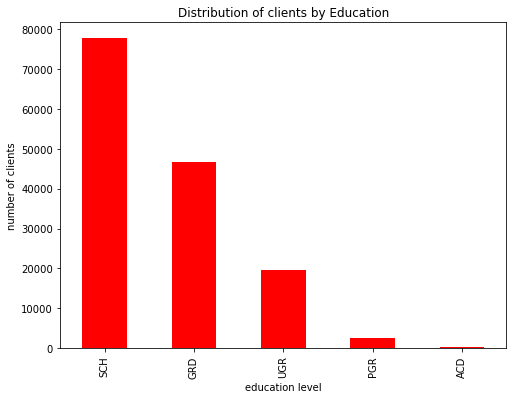

In [626]:
data.education.value_counts().plot(
    kind="bar",
    figsize=(8,6),
    color="r",
    title='Distribution of clients by Education',
    xlabel='education level',
    ylabel='number of clients'
)

print("Пропущенные значения:", data.education.isna().sum())
print()

In [627]:
# заполним пропуски наиболее часто встречающимся значением
data.education = data.education.fillna("SCH")

### Количественные признаки

Проверим числовые признаки на наличие выбросов.

25-й перцентиль: 30.0, 75-й перцентиль: 48.0, IQR: 18.0, Границы выбросов [3.0, 75.0].


<module 'matplotlib.pyplot' from 'C:\\Users\\m9\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

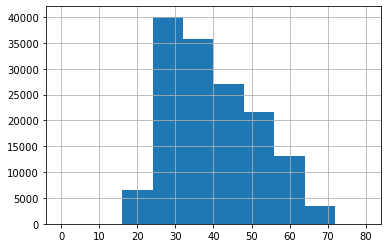

In [628]:
# 'age'
## Найдем границы выбрасов

median_age = data.age.median()
IQR_age = data.age.quantile(0.75) - data.age.quantile(0.25)
quant_25_age = data.age.quantile(0.25)
quant_75_age = data.age.quantile(0.75)
print('25-й перцентиль: {}, 75-й перцентиль: {}, IQR: {}, Границы выбросов [{}, {}].'.format(
    quant_25_age, quant_75_age, 
    IQR_age, 
    quant_25_age - 1.5*IQR_age, 
    quant_75_age + 1.5*IQR_age))
data.age.loc[data.age.between(
    quant_25_age - 1.5*IQR_age, 
    quant_75_age + 1.5*IQR_age)].hist(bins=10, range=(0, 80))
plt

In [629]:
data.age.describe() # Посмотрим с помощью описательной статистики.

count    147598.000000
mean         39.280641
std          11.520339
min          21.000000
25%          30.000000
50%          37.000000
75%          48.000000
max          72.000000
Name: age, dtype: float64

25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0, Границы выбросов [0.0, 0.0].


<module 'matplotlib.pyplot' from 'C:\\Users\\m9\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

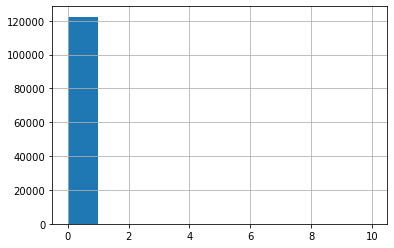

In [630]:
# 'decline_app_cnt'
## Найдем границы выбрасов

median_decline_app_cnt = data.decline_app_cnt.median()
IQR_decline_app_cnt = data.decline_app_cnt.quantile(0.75) - data.decline_app_cnt.quantile(0.25)
quant_25_decline_app_cnt = data.decline_app_cnt.quantile(0.25)
quant_75_decline_app_cnt = data.decline_app_cnt.quantile(0.75)
print('25-й перцентиль: {}, 75-й перцентиль: {}, IQR: {}, Границы выбросов [{}, {}].'.format(
    quant_25_decline_app_cnt, quant_75_decline_app_cnt, 
    IQR_decline_app_cnt, 
    quant_25_decline_app_cnt - 1.5*IQR_decline_app_cnt, 
    quant_75_decline_app_cnt + 1.5*IQR_decline_app_cnt))
data.decline_app_cnt.loc[data.decline_app_cnt.between(
    quant_25_decline_app_cnt - 1.5*IQR_decline_app_cnt, 
    quant_75_decline_app_cnt + 1.5*IQR_decline_app_cnt)].hist(bins=10, range=(0, 10))
plt

In [631]:
data.decline_app_cnt.describe() # Посмотрим с помощью описательной статистики.

count    147598.000000
mean          0.275749
std           0.804269
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          33.000000
Name: decline_app_cnt, dtype: float64

<AxesSubplot:>

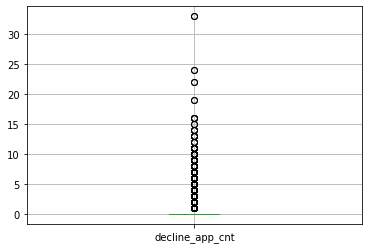

In [632]:
data.boxplot(column=['decline_app_cnt']) # Построим ящик с усами.

Мы видим, что все значения отличные от нуля считаются выбросами, удалять их не имеет смысла, так что посмотрим как поведет себя модель с данным признаком.

25-й перцентиль: 0.0, 75-й перцентиль: 3.0, IQR: 3.0, Границы выбросов [-4.5, 7.5].


<module 'matplotlib.pyplot' from 'C:\\Users\\m9\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

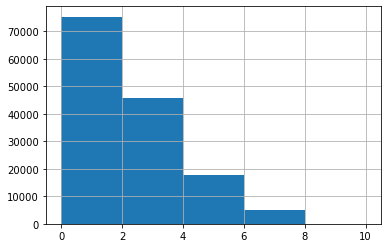

In [633]:
# 'bki_request_cnt'
## Найдем границы выбрасов

median_bki_request_cnt = data.bki_request_cnt.median()
IQR_bki_request_cnt = data.bki_request_cnt.quantile(0.75) - data.bki_request_cnt.quantile(0.25)
quant_25_bki_request_cnt = data.bki_request_cnt.quantile(0.25)
quant_75_bki_request_cnt = data.bki_request_cnt.quantile(0.75)
print('25-й перцентиль: {}, 75-й перцентиль: {}, IQR: {}, Границы выбросов [{}, {}].'.format(
    quant_25_bki_request_cnt, quant_75_bki_request_cnt, 
    IQR_bki_request_cnt, 
    quant_25_bki_request_cnt - 1.5*IQR_bki_request_cnt, 
    quant_75_bki_request_cnt + 1.5*IQR_bki_request_cnt))
data.bki_request_cnt.loc[data.bki_request_cnt.between(
    quant_25_bki_request_cnt - 1.5*IQR_bki_request_cnt, 
    quant_75_bki_request_cnt + 1.5*IQR_bki_request_cnt)].hist(bins=5, range=(0, 10))
plt

In [634]:
data.bki_request_cnt.describe() # Посмотрим с помощью описательной статистики.


count    147598.000000
mean          2.000339
std           2.252065
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          53.000000
Name: bki_request_cnt, dtype: float64

25-й перцентиль: 20000.0, 75-й перцентиль: 48000.0, IQR: 28000.0, Границы выбросов [-22000.0, 90000.0].


<module 'matplotlib.pyplot' from 'C:\\Users\\m9\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

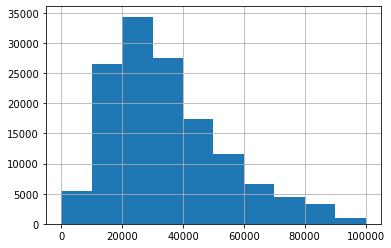

In [635]:
# 'income'
## Найдем границы выбрасов

median_income = data.income.median()
IQR_income = data.income.quantile(0.75) - data.income.quantile(0.25)
quant_25_income = data.income.quantile(0.25)
quant_75_income = data.income.quantile(0.75)
print('25-й перцентиль: {}, 75-й перцентиль: {}, IQR: {}, Границы выбросов [{}, {}].'.format(
    quant_25_income, quant_75_income, 
    IQR_income, 
    quant_25_income - 1.5*IQR_income, 
    quant_75_income + 1.5*IQR_income))
data.income.loc[data.income.between(
    quant_25_income - 1.5*IQR_income, 
    quant_75_income + 1.5*IQR_income)].hist(bins=10, range=(0, 100000))
plt

In [636]:
data.income.describe() # Посмотрим с помощью описательной статистики.


count     147598.000000
mean       41099.775417
std        46166.166006
min         1000.000000
25%        20000.000000
50%        30000.000000
75%        48000.000000
max      1000000.000000
Name: income, dtype: float64

В результате мы увидели, что выбросы есть в параметрах:  'bki_request_cnt' и 'income'. Теперь удаляем.

In [637]:
# Удалим выбросы
q_low_brc = quant_25_bki_request_cnt - 1.5*IQR_bki_request_cnt
q_hi_brc  = quant_75_bki_request_cnt + 1.5*IQR_bki_request_cnt

data = data[(data['bki_request_cnt'] < q_hi_brc) & (data['bki_request_cnt'] > q_low_brc)]

In [638]:
q_low_inc = quant_25_income - 1.5*IQR_income
q_hi_inc  = quant_75_income + 1.5*IQR_income

data = data[(data['income'] < q_hi_inc) & (data['income'] > q_low_brc)]

<AxesSubplot:>

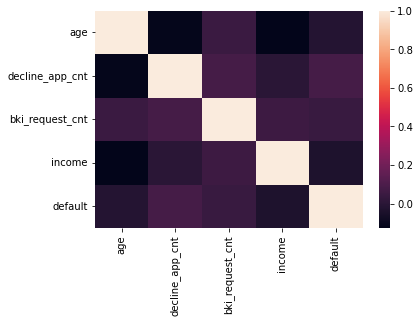

In [639]:
#Проведем корреляционный анализ, что бы отобрать низко коррелируемые признаки.

plt.figure()
sns.heatmap((data[['age', 'decline_app_cnt', 'bki_request_cnt', 'income', 'default']]).corr())

Корреляция между признаками < 0.4, поэтому на данном этапе никакие признаки удалять из модели не будем.

<AxesSubplot:>

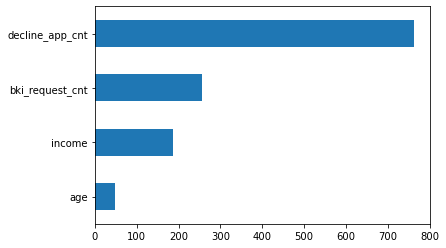

In [640]:
#Оценим значимость числовых переменных для модели

imp_num = Series(f_classif(data[num_cols], data['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

Самые значимые признаки -  decline_app_cnt и bki_request_cnt


### Категоральные признаки.

Преобразуем бинарные признаки в числовые (0 или 1).



In [641]:
label_encoder = LabelEncoder()

mapped_education = pd.Series(label_encoder.fit_transform(data['sex']))
print(dict(enumerate(label_encoder.classes_)))

{0: 'F', 1: 'M'}


In [642]:
# Для бинарных признаков мы будем использовать LabelEncoder

label_encoder = LabelEncoder()

for column in bin_cols:
    data[column] = label_encoder.fit_transform(data[column])
    
# убедимся в преобразовании    
data.head()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default,sample
0,25905,SCH,1,62,1,1,0,0,1,1,2,18000,0,0,0
1,63161,SCH,0,59,0,0,0,0,3,2,3,19000,0,0,0
2,25887,SCH,1,25,1,0,2,0,1,1,2,30000,1,0,0
3,16222,SCH,0,53,0,0,0,0,2,2,3,10000,0,0,0
4,101655,GRD,1,48,0,0,0,1,1,2,3,30000,1,0,0


In [643]:
# закодируем категориальные признаки

mappc = {}

label_encoder = LabelEncoder()

for col in cat_cols:
    data[col] = label_encoder.fit_transform(data[col])
    mappc[col] = dict(enumerate(label_encoder.classes_))
    
print(mappc)

{'education': {0: 'ACD', 1: 'GRD', 2: 'PGR', 3: 'SCH', 4: 'UGR'}, 'work_address': {0: 1, 1: 2, 2: 3}, 'home_address': {0: 1, 1: 2, 2: 3}}


<AxesSubplot:>

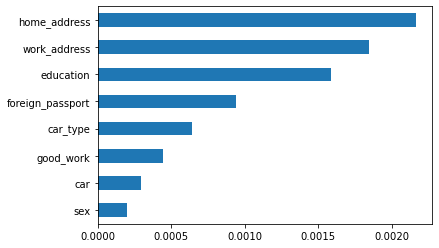

In [644]:
#Проверим значимость категориальных признаков

imp_cat = Series(mutual_info_classif(data[bin_cols + cat_cols], data['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

Самые значимые параметры для модели - home_address, work_address и education



### Подготовка данных к машинному обучению

In [645]:
X_cat = OneHotEncoder(sparse = False).fit_transform(df_train[cat_cols].values)
X_cat

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [646]:
Y_cat = OneHotEncoder(sparse = False).fit_transform(df_test[cat_cols].values)
Y_cat

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [647]:
# Стандартизация числовых непрерывных переменных на обучающей базе

X_num = StandardScaler().fit_transform(df_train[num_cols].values)
X_num

array([[ 1.97211528e+00, -3.42857656e-01, -4.44188844e-01,
        -5.00363267e-01],
       [ 1.71170539e+00, -3.42857656e-01,  4.43888001e-01,
        -4.78702309e-01],
       [-1.23960668e+00,  2.14387966e+00, -4.44188844e-01,
        -2.40431770e-01],
       ...,
       [-7.18786904e-01, -3.42857656e-01,  8.87926424e-01,
         8.44826013e-02],
       [-8.92393496e-01, -3.42857656e-01,  4.43888001e-01,
        -6.08668058e-01],
       [-4.58377015e-01, -3.42857656e-01, -1.50421558e-04,
        -3.48736561e-01]])

In [648]:
# Стандартизация числовых непрерывных переменных на тестовой базе

Y_num = StandardScaler().fit_transform(df_test[num_cols].values)
Y_num

array([[ 1.97211528e+00, -3.42857656e-01, -4.44188844e-01,
        -5.00363267e-01],
       [ 1.71170539e+00, -3.42857656e-01,  4.43888001e-01,
        -4.78702309e-01],
       [-1.23960668e+00,  2.14387966e+00, -4.44188844e-01,
        -2.40431770e-01],
       ...,
       [-7.18786904e-01, -3.42857656e-01,  8.87926424e-01,
         8.44826013e-02],
       [-8.92393496e-01, -3.42857656e-01,  4.43888001e-01,
        -6.08668058e-01],
       [-4.58377015e-01, -3.42857656e-01, -1.50421558e-04,
        -3.48736561e-01]])

In [649]:
# Объединяем

X = np.hstack([X_num, df_train[bin_cols].values, X_cat])
Y = df_train['default'].values

id_test = df_test['client_id']
test = np.hstack([Y_num, df_test[bin_cols].values, Y_cat])

In [650]:
# Разделяем обучающую выборку на тренировочную и валидационную
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle = True)

In [651]:
train_data = data.query('sample == 1').drop(['sample'], axis=1) 
test_data = data.query('sample == 0').drop(['sample'], axis=1)

In [652]:
y = train_data.default.values
X = train_data.drop(['default'], axis=1).values

In [653]:
def count_metrics(y_test, y_pred, y_probs):    
    metrics = {}
    metrics['accuracy'] = accuracy_score(y_test, y_pred)
    metrics['f1'] = f1_score(y_test, y_pred)
    metrics['roc_auc'] = roc_auc_score(y_test, y_probs)  
    metrics['confusion'] = confusion_matrix(y_test, y_pred)
    return metrics 

def show_roc_auc(y_test, y_probs):
    fpr, tpr, threshold = roc_curve(y_test, y_probs)
    roc_auc = roc_auc_score(y_test, y_probs)
    plt.figure()
    plt.plot([0, 1], label='Baseline', linestyle='--')
    plt.plot(fpr, tpr, label = 'Regression')
    plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc = 'lower right')
    plt.show()

In [654]:
#Разделим данные для обучения:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [655]:
# Логистическая регрессия 
model_naive = LogisticRegression(max_iter = 1000)

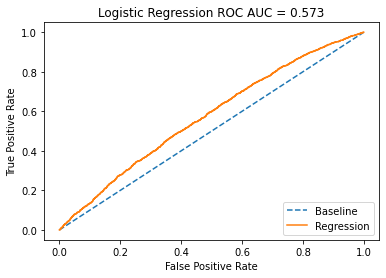

,naive
accuracy,0.869423
f1,0.0
roc_auc,0.573147
confusion,"[[11672, 0], [1753, 0]]"


In [656]:
model_naive.fit(X_train, y_train)
y_pred = model_naive.predict(X_test)
y_probs = model_naive.predict_proba(X_test)[:,1]

#посмотрим метрики
metrics_naive = count_metrics(y_test, y_pred, y_probs)
data_metrics = pd.DataFrame.from_dict(metrics_naive, orient='index',columns = ['naive'])

show_roc_auc(y_test, y_probs)
display(data_metrics)

Значение ROC AUC довольно высоко, построим confusion matrixx



[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

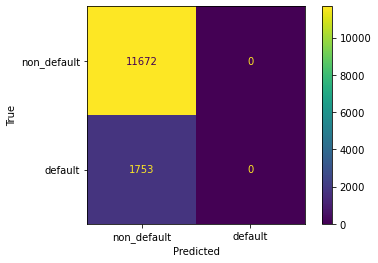

In [657]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['non_default','default'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

In [658]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample', 'default'], axis=1)

#Делим категориальные переменные на 0 и 1
X_cat = OneHotEncoder(sparse = False).fit_transform(data[cat_cols].values)

y = train_data['default'].values  # наш таргет
X = train_data.drop(['default'], axis=1)

In [659]:
X_cat.shape

(134248, 11)

In [660]:
# Стандартизация числовых переменных
X_num = StandardScaler().fit_transform(data[num_cols].values)

Объединим стандартизованные числовые, бинарные и закодированные категориальные переменные в одно признаковое пространство, разделив при этом признаки и целевую переменную.



In [661]:
#Объединяем

X = np.hstack([X_num, data[bin_cols].values, X_cat])
Y = data['default'].values

In [662]:
#Подготовка для модели завершена. Разделим данные для обучения:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42 )

Создадим и обучим первую модель на стандартных настройках логистической регрессии



In [663]:
model_1 = LogisticRegression(max_iter=1000, random_state=42)
model_1.fit(X_train, y_train)
preds = model_1.predict(X_test)

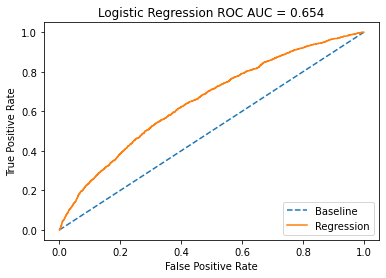

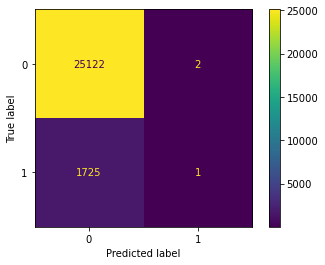

In [664]:
probs = model_1.predict_proba(X_test)
probs = probs[:,1]

fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = "lower right")
plt.show()

plot_confusion_matrix(model_1, X_test, y_test)
plt.show()

In [665]:
print('Accuracy: %.3f' % accuracy_score(y_test, preds))
print('Precision: %.3f' % precision_score(y_test, preds))
print('Recall: %.3f' % recall_score(y_test, preds))
print('F1: %.3f' % f1_score(y_test, preds))
print('MSE: {}' .format(np.round(mean_squared_error(y_test, preds), 3)))

Accuracy: 0.936
Precision: 0.333
Recall: 0.001
F1: 0.001
MSE: 0.064


In [666]:
# Добавляем гиперпараметры # Попробуем улучшить модель путем подбора параметров - penalty and C, используя GridSearchCV


penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)


hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression()
model.fit(X_train, y_train)

clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

print('Best penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best penalty: l2
Best C: 1.0


Обрабатываем тестовую выборку, загружаем в модель и готовим submission



In [667]:
lgr = LogisticRegression(penalty = 'l2', C=1.0, max_iter=500)
lgr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

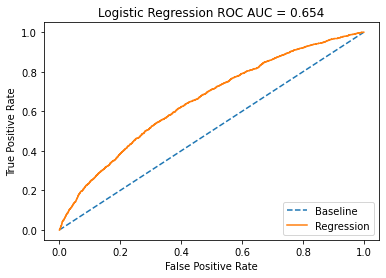

In [668]:
# Воспользуемся анализом ROC-кривой для оценки модели 

lgr = LogisticRegression(penalty = 'l2', C=59.94842503189409, max_iter=500)
lgr.fit(X_train, y_train)

probs = lgr.predict_proba(X_test)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [669]:
# Проверим другие метрики:

y_pred = lgr.predict(X_test)
print('accuracy score:', accuracy_score(y_test,y_pred))
print('precision score:', precision_score(y_test,y_pred))
print('recall score:',recall_score(y_test,y_pred))
print('f1 score:', f1_score(y_test,y_pred))

accuracy score: 0.9356797020484171
precision score: 0.3333333333333333
recall score: 0.0005793742757821553
f1 score: 0.0011567379988432621


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

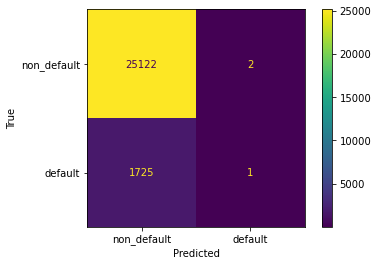

In [670]:
# И еще раз обратимся к матрице ошибок:

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['non_default', 'default'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

In [671]:
train_data = data.query('sample == 1').drop(['sample', 'client_id'], axis=1)
test_data = data.query('sample == 0').drop(['sample', 'client_id'], axis=1)

X_train = train_data.drop(['default'], axis=1)
y_train = train_data.default.values
X_test = test_data.drop(['default'], axis=1)
y_test = test_data.default.values

In [672]:
model = LogisticRegression()

iter_ = 50
epsilon_stop = 1e-3

param_grid = [
    {'penalty': ['l1'], 
     'solver': ['liblinear', 'lbfgs'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
    {'penalty': ['l2'], 
     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
    {'penalty': ['none'], 
     'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
]

## model ваша модель логистической регрессии
gridsearch = GridSearchCV(model, param_grid, scoring='f1', n_jobs=-1, cv=5)
gridsearch.fit(X_train, y_train)
model = gridsearch.best_estimator_

##печатаем параметры
best_parameters = model.get_params()
for param_name in sorted(best_parameters.keys()):
        print('\t%s: %r' % (param_name, best_parameters[param_name]))

	C: 1.0
	class_weight: 'balanced'
	dual: False
	fit_intercept: True
	intercept_scaling: 1
	l1_ratio: None
	max_iter: 50
	multi_class: 'ovr'
	n_jobs: None
	penalty: 'l1'
	random_state: None
	solver: 'liblinear'
	tol: 0.001
	verbose: 0
	warm_start: False
